In [653]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FactorAnalysis
# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, explained_variance_score, max_error

from time import process_time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError

from sklearn.neural_network import MLPRegressor

from sklearn.metrics import r2_score

In [654]:
df = pd.read_csv('Rathmines_FileforML.csv', thousands=',', low_memory=False)

In [655]:
df = df.dropna(axis=0)

In [656]:
df['Date'] = df['Date'].astype('datetime64')

In [657]:
def DropHead(Dataframe, Feature):

    Dataframe.drop(Feature, axis=1, inplace=True)
    
DropHead(df, 'indrain')
DropHead(df, 'indtemp')
DropHead(df, 'indwetb')
DropHead(df, 'indwdsp')
DropHead(df, 'indwddir')
DropHead(df, 'wetb')
DropHead(df, 'dewpt')
DropHead(df, 'vappr')
DropHead(df, 'rhum')
DropHead(df, 'ww')
DropHead(df, 'w')
DropHead(df, 'sun')
DropHead(df, 'vis')
DropHead(df, 'clht')
DropHead(df, 'clamt')
DropHead(df, 'NOX')
DropHead(df, 'NO')
DropHead(df, 'PM25')
DropHead(df, 'Date')

In [658]:
print(len(df))

12595


In [659]:
df.head()

,Hour,rain,temp,msl,wdsp,wddir,NO2,Ozone,SO2,PM10
6142,12,0.6,8.8,983.5,10,360,28.65,46.4,3.5,3.3
6143,13,0.4,9.0,983.2,4,360,34.38,46.2,3.5,5.5
6144,14,0.2,9.1,983.3,4,200,40.30,35.0,3.2,7.8
6145,15,0.2,9.1,982.5,4,290,54.05,17.8,3.5,10.8
6146,16,0.5,7.0,982.1,6,340,58.64,12.4,3.7,11.2


In [660]:
Sdf = df[['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone', 'NO2', 'SO2', 'PM10']].copy()

In [661]:
Posdf = df[(df['Ozone'] >= 0) & (df['NO2'] >= 0) & (df['PM10'] >= 0)]
SPosdf = Sdf[(Sdf['SO2'] >= 0) & (Sdf['NO2'] >= 0) & (Sdf['PM10'] >= 0) & (df['Ozone'] >= 0)]

In [662]:
Posdf.drop('SO2', axis=1, inplace=True)

In [663]:
print(len(Posdf))
print(len(SPosdf))

12375
12369


In [664]:
Posdf.head()

,Hour,rain,temp,msl,wdsp,wddir,NO2,Ozone,PM10
6142,12,0.6,8.8,983.5,10,360,28.65,46.4,3.3
6143,13,0.4,9.0,983.2,4,360,34.38,46.2,5.5
6144,14,0.2,9.1,983.3,4,200,40.30,35.0,7.8
6145,15,0.2,9.1,982.5,4,290,54.05,17.8,10.8
6146,16,0.5,7.0,982.1,6,340,58.64,12.4,11.2


In [665]:
Posdf.describe()

,Hour,rain,temp,msl,wdsp,wddir,NO2,Ozone,PM10
count,12375.000000,12375.000000,12375.000000,12375.000000,12375.000000,12375.000000,12375.000000,12375.000000,12375.000000
mean,11.889131,0.106053,10.114392,1013.320234,9.705859,201.537778,20.267527,48.894465,12.472598
std,6.826913,0.445277,4.981408,12.761931,4.741596,81.788357,16.123212,21.314137,11.668520
min,0.000000,0.000000,0.200000,972.000000,1.000000,10.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,6.400000,1005.300000,6.000000,140.000000,8.600000,35.200000,5.900000
50%,12.000000,0.000000,9.500000,1015.200000,9.000000,220.000000,16.400000,50.000000,9.300000
75%,18.000000,0.000000,13.600000,1022.100000,12.000000,260.000000,27.100000,62.800000,15.100000
max,23.000000,10.500000,26.300000,1044.500000,34.000000,360.000000,183.000000,153.600000,173.500000


In [666]:
SPosdf.describe()

,Hour,rain,temp,msl,wdsp,wddir,Ozone,NO2,SO2,PM10
count,12369.000000,12369.000000,12369.000000,12369.000000,12369.000000,12369.000000,12369.000000,12369.000000,12369.000000,12369.000000
mean,11.890614,0.106104,10.114439,1013.315919,9.707656,201.544992,48.899927,20.264229,1.807056,12.473684
std,6.825923,0.445379,4.982197,12.762304,4.741276,81.769412,21.313736,16.121979,1.601337,11.671087
min,0.000000,0.000000,0.200000,972.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,6.400000,1005.300000,6.000000,140.000000,35.200000,8.600000,0.800000,5.900000
50%,12.000000,0.000000,9.500000,1015.200000,9.000000,220.000000,50.000000,16.400000,1.330000,9.300000
75%,18.000000,0.000000,13.600000,1022.100000,12.000000,260.000000,62.800000,27.100000,2.130000,15.100000
max,23.000000,10.500000,26.300000,1044.500000,34.000000,360.000000,153.600000,183.000000,29.260000,173.500000


In [667]:
Posdf['Ozone'] = Posdf['Ozone']+1.00
Posdf['PM10'] = Posdf['PM10']+1.00
Posdf['NO2'] = Posdf['NO2']+1.00
Posdf['wdsp'] = Posdf['wdsp']+1.00
Posdf['temp'] = Posdf['temp']+1.00
Posdf['rain'] = Posdf['rain']+1.00
Posdf['Hour'] = Posdf['Hour']+1.00
Posdf['wddir'] = Posdf['wddir']/360 + 1.00
Posdf['msl'] = Posdf['msl']/1000

SPosdf['Ozone'] = SPosdf['Ozone']+1.00
SPosdf['PM10'] = SPosdf['PM10']+1.00
SPosdf['NO2'] = SPosdf['NO2']+1.00
SPosdf['wdsp'] = SPosdf['wdsp']+1.00
SPosdf['temp'] = SPosdf['temp']+1.00
SPosdf['SO2'] = SPosdf['SO2']+1.00
SPosdf['rain'] = SPosdf['rain']+1.00
SPosdf['Hour'] = SPosdf['Hour']+1.00
SPosdf['wddir'] = SPosdf['wddir']/360 + 1.00
SPosdf['msl'] = SPosdf['msl']/1000

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [668]:
def Yeardf(Date1, Date2):
    import datetime
    Sorteddf = Posdf[(Posdf['Date'] > Date1) & (Posdf['Date']< Date2)]
    return Sorteddf

DTotalYears = Yeardf("2017-11-21", "2020-01-01")

KeyError: 'Date'

In [669]:
Y16 = pd.read_csv('Rathmines Met and Pollutant Data 2016.csv', thousands=',', low_memory=False)

In [670]:
DayPM10_16 = pd.read_csv('Rathmines_PM10_2016_day.csv', thousands=',', low_memory=False)

In [671]:
DY16 = Y16[['Date', 'Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone', 'NO2']].copy()
SY16SO = Y16[['Date', 'Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone', 'NO2', 'SO2']].copy()

In [672]:
DY16['Date'] = DY16['Date'].astype('datetime64')
SY16SO['Date'] = SY16SO['Date'].astype('datetime64')

In [673]:
DayPM10_16['Date'] = DayPM10_16['Date'].astype('datetime64')

In [674]:
DayPM10_16.dtypes


Date    datetime64[ns]
PM10           float64
dtype: object

In [675]:
def DropDates(Set1, Set2):
    Date1 = []
    Date2 = []
    Date1 = Set1.loc[(Set1['NO2'].isnull() | Set1['Ozone'].isnull()), 'Date'].values
    Date2 = Set2.loc[(Set2['SO2'].isnull() | Set2['NO2'].isnull() | Set2['Ozone'].isnull()), 'Date'].values
    #Date = Set[Set['SO2']=='Nan']['Date'].values[0]   
    return Date1, Date2

Date16, SDate16 = DropDates(DY16, SY16SO)


In [676]:
print(len(Date16))

472


In [677]:
df16 = pd.DataFrame(list(zip(Date16)), columns =['Date NaN'])
Sdf16 = pd.DataFrame(list(zip(SDate16)), columns =['Date NaN'])

df16['Dates'] = pd.to_datetime(df16['Date NaN']).dt.date
df16['Time'] = pd.to_datetime(df16['Date NaN']).dt.time
Sdf16['Dates'] = pd.to_datetime(Sdf16['Date NaN']).dt.date
Sdf16['Time'] = pd.to_datetime(Sdf16['Date NaN']).dt.time


In [715]:
print(len(Sdf16))


6720


In [679]:
DY16['Dates'] = pd.to_datetime(DY16['Date']).dt.date
DY16['Time'] = pd.to_datetime(DY16['Date']).dt.time
SY16SO['Dates'] = pd.to_datetime(SY16SO['Date']).dt.date
SY16SO['Time'] = pd.to_datetime(SY16SO['Date']).dt.time

In [680]:
#Clean NaNs
def CleanNans(Frame1, Frame2):
    a = []
    a = Frame2['Dates'].values
    newdf = Frame1[~Frame1['Dates'].isin(a)]
    #df3 = pd.concat([Frame1, Frame2]).drop_duplicates(subset='Dates', keep=False)
    
    return newdf

ndf16 = CleanNans(DY16, df16)
Sdf16 = CleanNans(SY16SO, Sdf16)

print(len(ndf16))


7728


In [681]:
print(ndf16)

                    Date  Hour  rain  temp     msl  wdsp  wddir  Ozone  \
0    2016-01-01 00:00:00     0   0.0   1.9  1016.2     8    200   47.6   
1    2016-01-01 01:00:00     1   0.0   1.6  1016.3     7    200   50.5   
2    2016-01-01 02:00:00     2   0.0   0.7  1016.5     6    190   37.8   
3    2016-01-01 03:00:00     3   0.0   0.8  1016.4     6    170    9.6   
4    2016-01-01 04:00:00     4   0.0   2.9  1016.2     5    170   16.2   
5    2016-01-01 05:00:00     5   0.0   3.0  1015.7     7    160   26.1   
6    2016-01-01 06:00:00     6   0.0   3.6  1014.7     8    150   13.6   
7    2016-01-01 07:00:00     7   0.0   3.9  1014.2     7    150   22.6   
8    2016-01-01 08:00:00     8   0.0   3.9  1013.4     6    120   40.2   
9    2016-01-01 09:00:00     9   0.0   5.7  1012.1     7    130   21.9   
10   2016-01-01 10:00:00    10   0.1   7.6  1011.4    18    140   53.9   
11   2016-01-01 11:00:00    11   0.0   7.6  1010.0    23    140   55.0   
12   2016-01-01 12:00:00    12   0.0  

In [682]:
DYear16 = ndf16[['Date']].copy()
DYear16['Dates'] = pd.to_datetime(DYear16['Date']).dt.date
DYear16['Time'] = pd.to_datetime(DYear16['Date']).dt.time

SDYear16 = Sdf16[['Date']].copy()
SDYear16['Dates'] = pd.to_datetime(SDYear16['Date']).dt.date
SDYear16['Time'] = pd.to_datetime(SDYear16['Date']).dt.time
display(SDYear16)

,Date,Dates,Time
0,2016-01-01 00:00:00,2016-01-01,00:00:00
1,2016-01-01 01:00:00,2016-01-01,01:00:00
2,2016-01-01 02:00:00,2016-01-01,02:00:00
3,2016-01-01 03:00:00,2016-01-01,03:00:00
4,2016-01-01 04:00:00,2016-01-01,04:00:00
5,2016-01-01 05:00:00,2016-01-01,05:00:00
6,2016-01-01 06:00:00,2016-01-01,06:00:00
7,2016-01-01 07:00:00,2016-01-01,07:00:00
8,2016-01-01 08:00:00,2016-01-01,08:00:00
9,2016-01-01 09:00:00,2016-01-01,09:00:00


In [683]:
Year16 = ndf16[['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone', 'NO2']].copy()
SYear16 = Sdf16[['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone', 'NO2', 'SO2']].copy()
display(SYear16)

,Hour,rain,temp,msl,wdsp,wddir,Ozone,NO2,SO2
0,0,0.0,1.9,1016.2,8,200,47.6,11.460000,0.3
1,1,0.0,1.6,1016.3,7,200,50.5,10.791500,0.1
2,2,0.0,0.7,1016.5,6,190,37.8,20.882666,-0.6
3,3,0.0,0.8,1016.4,6,170,9.6,40.301000,-0.3
4,4,0.0,2.9,1016.2,5,170,16.2,40.730750,-0.5
5,5,0.0,3.0,1015.7,7,160,26.1,32.947500,-0.2
6,6,0.0,3.6,1014.7,8,150,13.6,37.674750,-0.5
7,7,0.0,3.9,1014.2,7,150,22.6,28.268000,-0.6
8,8,0.0,3.9,1013.4,6,120,40.2,16.139500,-0.5
9,9,0.0,5.7,1012.1,7,130,21.9,35.955750,0.1


In [684]:
SPosdf.head()

,Hour,rain,temp,msl,wdsp,wddir,Ozone,NO2,SO2,PM10
6142,13.0,1.6,9.8,0.9835,11.0,2.000000,47.4,29.65,4.5,4.3
6143,14.0,1.4,10.0,0.9832,5.0,2.000000,47.2,35.38,4.5,6.5
6144,15.0,1.2,10.1,0.9833,5.0,1.555556,36.0,41.30,4.2,8.8
6145,16.0,1.2,10.1,0.9825,5.0,1.805556,18.8,55.05,4.5,11.8
6146,17.0,1.5,8.0,0.9821,7.0,1.944444,13.4,59.64,4.7,12.2


In [685]:
print(len(Posdf))

12375


In [686]:
Year16.describe()

,Hour,rain,temp,msl,wdsp,wddir,Ozone,NO2
count,7728.000000,7728.000000,7728.000000,7728.000000,7728.000000,7728.000000,7728.000000,7728.000000
mean,11.500000,0.078429,9.805991,1013.923913,10.568970,204.235248,36.108734,20.043338
std,6.922634,0.348487,5.257682,11.846164,5.356856,84.204328,21.109798,16.252564
min,0.000000,0.000000,-4.800000,968.200000,0.000000,0.000000,-14.000000,0.000000
25%,5.750000,0.000000,5.800000,1007.100000,7.000000,140.000000,21.800000,8.213000
50%,11.500000,0.000000,9.800000,1015.500000,10.000000,230.000000,35.650000,15.089000
75%,17.250000,0.000000,13.900000,1022.025000,14.000000,260.000000,52.600000,26.740000
max,23.000000,8.400000,26.000000,1041.900000,35.000000,360.000000,91.800000,101.994000


In [687]:
SYear16.describe()

,Hour,rain,temp,msl,wdsp,wddir,Ozone,NO2,SO2
count,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000,6720.000000
mean,11.500000,0.076369,10.190774,1013.883423,10.624107,203.360119,35.135967,19.843872,1.789152
std,6.922702,0.345784,5.312850,11.634130,5.382366,84.408704,20.920675,16.327442,1.842707
min,0.000000,0.000000,-4.800000,968.200000,0.000000,0.000000,-14.000000,0.000000,-3.700000
25%,5.750000,0.000000,6.100000,1007.300000,7.000000,140.000000,21.000000,8.022000,0.500000
50%,11.500000,0.000000,10.500000,1015.600000,10.000000,230.000000,34.600000,14.707000,1.300000
75%,17.250000,0.000000,14.300000,1021.800000,14.000000,260.000000,51.200000,26.549000,2.400000
max,23.000000,8.400000,26.000000,1041.900000,35.000000,360.000000,90.200000,101.994000,26.600000


In [688]:
Year16['Ozone'] = Year16['Ozone']+15.00
Year16['Hour'] = Year16['Hour']+1.00
Year16['rain'] = Year16['rain']+1.00
Year16['temp'] = Year16['temp']+5.80
Year16['wdsp'] = Year16['wdsp']+1.00
Year16['NO2'] = Year16['NO2']+1.00
Year16['wddir'] = Year16['wddir']/360 + 1.00
Year16['msl'] = Year16['msl']/1000

SYear16['Ozone'] = SYear16['Ozone']+15.00
SYear16['Hour'] = SYear16['Hour']+1.00
SYear16['SO2'] = SYear16['SO2']+4.70
SYear16['rain'] = SYear16['rain']+1.00
SYear16['temp'] = SYear16['temp']+5.80
SYear16['wdsp'] = SYear16['wdsp']+1.00
SYear16['NO2'] = SYear16['NO2']+1.00
SYear16['wddir'] = SYear16['wddir']/360 + 1.00
SYear16['msl'] = SYear16['msl']/1000

In [689]:
Posdf.head(5)

,Hour,rain,temp,msl,wdsp,wddir,NO2,Ozone,PM10
6142,13.0,1.6,9.8,0.9835,11.0,2.000000,29.65,47.4,4.3
6143,14.0,1.4,10.0,0.9832,5.0,2.000000,35.38,47.2,6.5
6144,15.0,1.2,10.1,0.9833,5.0,1.555556,41.30,36.0,8.8
6145,16.0,1.2,10.1,0.9825,5.0,1.805556,55.05,18.8,11.8
6146,17.0,1.5,8.0,0.9821,7.0,1.944444,59.64,13.4,12.2


In [690]:
SPosdf.head(5)

,Hour,rain,temp,msl,wdsp,wddir,Ozone,NO2,SO2,PM10
6142,13.0,1.6,9.8,0.9835,11.0,2.000000,47.4,29.65,4.5,4.3
6143,14.0,1.4,10.0,0.9832,5.0,2.000000,47.2,35.38,4.5,6.5
6144,15.0,1.2,10.1,0.9833,5.0,1.555556,36.0,41.30,4.2,8.8
6145,16.0,1.2,10.1,0.9825,5.0,1.805556,18.8,55.05,4.5,11.8
6146,17.0,1.5,8.0,0.9821,7.0,1.944444,13.4,59.64,4.7,12.2


In [691]:
def evaluate_model(X_test, y_test, model):
    
    # compute predictiond for the test set
    _predicted_values = model.predict(X_test)
    # compute metrics
    _mse = mean_squared_error(y_test, _predicted_values)
    _mae = mean_absolute_error(y_test, _predicted_values)
    _r2 = r2_score(y_test, _predicted_values)
    _meae = median_absolute_error(y_test, _predicted_values)
    _evs = explained_variance_score(y_test, _predicted_values)
    _me = max_error(y_test, _predicted_values)      
    return _mse, _mae, _r2, _meae, _evs, _me

In [692]:
class AddColumnNames(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(data=X, columns=self.columns)

In [693]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X[self.columns]

# Random Forest

In [694]:
%%time

def RandomForest(Name, Input1, Input2, N, printCV, printgraph, N_Features, Max_Depth, ratio, PM):
    
    Data = Input1
    
    names_all = [c for c in Data if c not in ['PM10']]

    column_list = Data.columns.values.tolist()
    Removed     = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    #y_test = Year2020['PM10']
    X_test = Input2
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                        ('regresson', RandomForestRegressor(n_estimators=100))])

    
    #print(len(Data))
    
    
    N_FEATURES_OPTIONS = [N_Features]
    MAX_DEPTH_OPTIONS = [Max_Depth]

    param_grid = [
        {
            'reduce_dim': [PCA(iterated_power=7)],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
            'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [FastICA( algorithm='deflation')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
    ]    

    search = GridSearchCV(pipe, param_grid, cv=10, iid = False, refit=True)
    search.fit(X_train, y_train)

    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)
    
        
 
    # store the best params and best model for later use
    RF_best_params = search.best_params_
    RF_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = RandomForestRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        #visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure
    
    #RF_mse, RF_mae, RF_r2, RF_meae, RF_evs, RF_me = evaluate_model(X_test, y_test, RF_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    #MSE  = np.array([RF_mse])
    #MAE  = np.array([RF_mae])
    #R2   = np.array([RF_r2])
    #MEAE = np.array([RF_meae])
    #ME   = np.array([RF_me])
    
    Predictions = model.predict(X_test)
    #df = pd.DataFrame(list(zip(Title, Range, Features, Depth, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Max Depth', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Predictions


Wall time: 0 ns


# Gradient Boosting

In [695]:
%%time
def GradientBoosting(Name, Input1, Input2, N, printCV, printgraph, N_Features, Max_Depth, ratio, PM):
    Data = Input1
    
    names_all = [c for c in Data if c not in ['PM10']]

    column_list = Data.columns.values.tolist()
    Removed     = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    #y_test = Year2020['PM10']
    X_test = Input2
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                           ('reduce_dim', 'passthrough'),
                           ('regresson', GradientBoostingRegressor())])



    N_FEATURES_OPTIONS = [N_Features]
    MAX_DEPTH_OPTIONS = [Max_Depth]


    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [PCA(iterated_power=7)],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
            'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        }


    ]
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    
    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

    # store the best params and best model for later use
    GB_best_params = search.best_params_
    GB_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = GradientBoostingRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        #visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    #GB_mse, GB_mae, GB_r2, GB_meae, GB_evs, GB_me = evaluate_model(X_test, y_test, GB_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    #MSE  = np.array([GB_mse])
    #MAE  = np.array([GB_mae])
    #R2   = np.array([GB_r2])
    #MEAE = np.array([GB_meae])
    #ME   = np.array([GB_me])
    
    Predictions = model.predict(X_test)
    #df = pd.DataFrame(list(zip(Title, Range, Features, Depth, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Max Depth', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Predictions
    

Wall time: 0 ns


# ANN

In [696]:
%%time
def ANN(Name, Input1, Input2, N, printCV, printgraph, N_Features, ratio, PM):
    Data = Input1
    
    names_all = [c for c in Data if c not in ['PM10']]

    column_list = Data.columns.values.tolist()
    Removed     = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    #y_test = Year2020['PM10']
    X_test = Input2
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', MLPRegressor ())])



    ALPHA = [0.001, 0.01, 0.1, 1, 10, 100], 
    HIDDEN_LAYER_SIZES = [(6),(11,11),(7,7,7)] 
    SOLVER = ['adam'] 
    ACTIVATION = ['relu','tanh','identity','logistic'] 
    LEARNING_RATE = ['constant','invscaling','adaptive']
    N_FEATURES_OPTIONS = [N_Features]
    MAX_ITER = [500]

    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },

    ]
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    

    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    MLP_best_params = search.best_params_
    MLP_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = MLPRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        #visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    #MLP_mse, MLP_mae, MLP_r2, MLP_meae, MLP_evs, MLP_me = evaluate_model(X_test, y_test, MLP_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    #MSE  = np.array([MLP_mse])
    #MAE  = np.array([MLP_mae])
    #R2   = np.array([MLP_r2])
    #MEAE = np.array([MLP_meae])
    #ME   = np.array([MLP_me])
    
    Predictions = model.predict(X_test)
    #df = pd.DataFrame(list(zip(Title, Range, Features, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Predictions
    

Wall time: 0 ns


# Linear Regression

In [697]:
%%time
def LRegress(Name, Input1, Input2, N, printCV, printgraph, N_Features, ratio, PM):
    Data = Input1
    
    names_all = [c for c in Data if c not in ['PM10']]

    column_list = Data.columns.values.tolist()
    Removed     = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    #y_test = Year2020['PM10']
    X_test = Input2
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
    )
   
    X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', LinearRegression())])



    N_FEATURES_OPTIONS = [N_Features]
    NORMALIZE_OPTIONS = [False, True]

    param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [FastICA( algorithm='deflation')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS
    }
]

    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)


    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    LR_best_params = search.best_params_
    LR_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = LinearRegression()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        #visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    #LR_mse, LR_mae, LR_r2, LR_meae, LR_evs, LR_me = evaluate_model(X_test, y_test, LR_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    #MSE  = np.array([LR_mse])
    #MAE  = np.array([LR_mae])
    #R2   = np.array([LR_r2])
    #MEAE = np.array([LR_meae])
    #ME   = np.array([LR_me])
    
    Predictions = model.predict(X_test)
    #df = pd.DataFrame(list(zip(Title, Range, Features, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Predictions

Wall time: 0 ns


# SVM

In [698]:
%%time
def SVM(Name, Input1, Input2, N, printCV, printgraph, N_Features, ratio, PM):
    Data = Input1
    
    names_all = [c for c in Data if c not in ['PM10']]

    column_list = Data.columns.values.tolist()
    Removed     = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    #y_test = Year2020['PM10']
    X_test = Input2
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', SVR())])



    KERNEL = ['linear']
    C = [300]
    GAMMA = ['auto']
    N_FEATURES_OPTIONS = [N_Features]


    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        }
    ]
    
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    

    
    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    SVR_best_params = search.best_params_
    SVR_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = SVR()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        #visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    #SVR_mse, SVR_mae, SVR_r2, SVR_meae, SVR_evs, SVR_me = evaluate_model(X_test, y_test, SVR_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    #MSE  = np.array([SVR_mse])
    #MAE  = np.array([SVR_mae])
    #R2   = np.array([SVR_r2])
    #MEAE = np.array([SVR_meae])
    #ME   = np.array([SVR_me])
    
    Predictions = model.predict(X_test)
    #df = pd.DataFrame(list(zip(Title, Range, Features, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Predictions

Wall time: 0 ns


['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'NO2', 'Ozone']
Best CV score = 0.169:
Best parameters:  {'reduce_dim': FastICA(algorithm='deflation', fun='logcosh', fun_args=None, max_iter=200,
        n_components=8, random_state=None, tol=0.0001, w_init=None,
        whiten=True), 'reduce_dim__n_components': 8, 'regresson__max_depth': 12}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\yellowbrick\base.py:237: YellowbrickWarning: PredictionError does not have a reference to a matplotlib.Axes the figure may not render as expected!
  warn_message.format(self.__class__.__name__), YellowbrickWarning


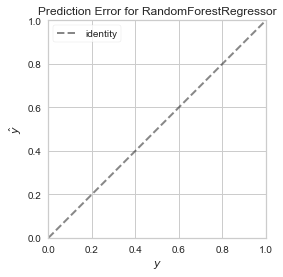

Wall time: 16min 11s


In [241]:
%%time
RFPred1 = RandomForest('Random Forest', Posdf, Year16, '2016 Prediction', 0, 0, 8, 12, 0.3, 'NO')

In [460]:
SYear16.describe()

,Hour,rain,temp,msl,wdsp,wddir,Ozone,NO2,SO2
count,7728.000000,7728.000000,7728.000000,7728.000000,7728.000000,7728.000000,7728.000000,7728.000000,7036.000000
mean,12.500000,1.078429,15.605991,1.013924,11.568970,1.567320,51.108734,21.043338,6.502814
std,6.922634,0.348487,5.257682,0.011846,5.356856,0.233901,21.109798,16.252564,1.831551
min,1.000000,1.000000,1.000000,0.968200,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.750000,1.000000,11.600000,1.007100,8.000000,1.388889,36.800000,9.213000,5.200000
50%,12.500000,1.000000,15.600000,1.015500,11.000000,1.638889,50.650000,16.089000,6.000000
75%,18.250000,1.000000,19.700000,1.022025,15.000000,1.722222,67.600000,27.740000,7.200000
max,24.000000,9.400000,31.800000,1.041900,36.000000,2.000000,106.800000,102.994000,31.300000


In [461]:
SYear16.dropna(axis=0)

,Hour,rain,temp,msl,wdsp,wddir,Ozone,NO2,SO2
0,1.0,1.0,7.7,1.0162,9.0,1.555556,62.6,12.460000,5.0
1,2.0,1.0,7.4,1.0163,8.0,1.555556,65.5,11.791500,4.8
2,3.0,1.0,6.5,1.0165,7.0,1.527778,52.8,21.882666,4.1
3,4.0,1.0,6.6,1.0164,7.0,1.472222,24.6,41.301000,4.4
4,5.0,1.0,8.7,1.0162,6.0,1.472222,31.2,41.730750,4.2
5,6.0,1.0,8.8,1.0157,8.0,1.444444,41.1,33.947500,4.5
6,7.0,1.0,9.4,1.0147,9.0,1.416667,28.6,38.674750,4.2
7,8.0,1.0,9.7,1.0142,8.0,1.416667,37.6,29.268000,4.1
8,9.0,1.0,9.7,1.0134,7.0,1.333333,55.2,17.139500,4.2
9,10.0,1.0,11.5,1.0121,8.0,1.361111,36.9,36.955750,4.8


['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'NO2', 'Ozone']
Best CV score = 0.171:
Best parameters:  {'reduce_dim': FastICA(algorithm='deflation', fun='logcosh', fun_args=None, max_iter=200,
        n_components=8, random_state=None, tol=0.0001, w_init=None,
        whiten=True), 'reduce_dim__n_components': 8, 'regresson__max_depth': 12}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\yellowbrick\base.py:237: YellowbrickWarning: PredictionError does not have a reference to a matplotlib.Axes the figure may not render as expected!
  warn_message.format(self.__class__.__name__), YellowbrickWarning


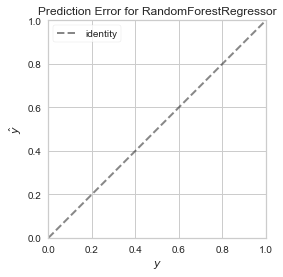

Wall time: 18min 45s


In [703]:
%%time
RFPred = RandomForest('Random Forest', Posdf, Year16, '2016 Prediction', 0, 0, 8, 12, 0.3, 'NO')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone', 'NO2', 'SO2']
Best CV score = 0.189:
Best parameters:  {'reduce_dim': FastICA(algorithm='deflation', fun='logcosh', fun_args=None, max_iter=200,
        n_components=9, random_state=None, tol=0.0001, w_init=None,
        whiten=True), 'reduce_dim__n_components': 9, 'regresson__max_depth': 12}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\yellowbrick\base.py:237: YellowbrickWarning: PredictionError does not have a reference to a matplotlib.Axes the figure may not render as expected!
  warn_message.format(self.__class__.__name__), YellowbrickWarning


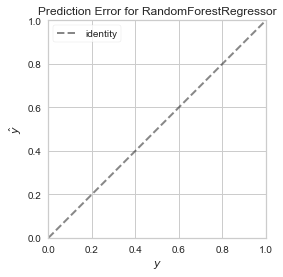

Wall time: 16min 14s


In [704]:
%%time
RFPredSO2 = RandomForest('Random Forest', SPosdf, SYear16, '2016 Prediction', 0, 0, 9, 12, 0.3, 'NO')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'NO2', 'Ozone']
Best CV score = 0.187:
Best parameters:  {'reduce_dim': FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=8,
               noise_variance_init=None, random_state=0,
               svd_method='randomized', tol=0.01), 'reduce_dim__n_components': 8}


C:\Users\User\Anaconda3\lib\site-packages\yellowbrick\base.py:237: YellowbrickWarning: PredictionError does not have a reference to a matplotlib.Axes the figure may not render as expected!
  warn_message.format(self.__class__.__name__), YellowbrickWarning


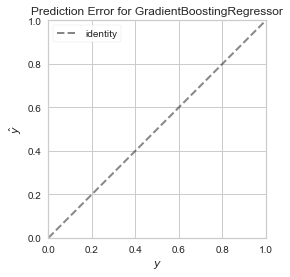

Wall time: 6min 54s


In [242]:
%%time
GBPred1 = GradientBoosting('Gradient Boosting', Posdf, Year16, '2016 Prediction', 0, 0, 8, 12, 0.3, 'NO')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'NO2', 'Ozone']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best CV score = 0.248:
Best parameters:  {'reduce_dim': FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=8,
               noise_variance_init=None, random_state=0, svd_method='lapack',
               tol=0.01), 'reduce_dim__n_components': 8}


C:\Users\User\Anaconda3\lib\site-packages\yellowbrick\base.py:237: YellowbrickWarning: PredictionError does not have a reference to a matplotlib.Axes the figure may not render as expected!
  warn_message.format(self.__class__.__name__), YellowbrickWarning


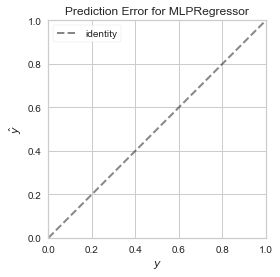

Wall time: 2min 20s


In [243]:
%%time
MLPPred1 = ANN('ANN', Posdf, Year16, '2016 Prediction', 0, 0, 8, 0.3, 'NO')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'NO2', 'Ozone']
Best CV score = 0.145:
Best parameters:  {'reduce_dim': RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=8, step=1, verbose=0), 'reduce_dim__n_features_to_select': 8, 'regresson__normalize': False}


C:\Users\User\Anaconda3\lib\site-packages\yellowbrick\base.py:237: YellowbrickWarning: PredictionError does not have a reference to a matplotlib.Axes the figure may not render as expected!
  warn_message.format(self.__class__.__name__), YellowbrickWarning


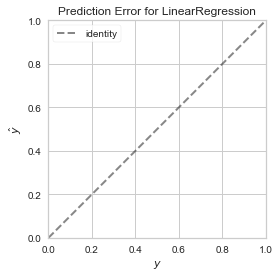

Wall time: 9min 47s


In [244]:
%%time
LRPred1 = LRegress('Linear Regression', Posdf, Year16, '2016 Prediction', 0, 0, 8, 0.3, 'NO')

In [527]:
Posdf.drop('Date', axis=1, inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [530]:
Posdf.drop('indrain', axis=1, inplace=True)

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'NO2', 'Ozone']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best CV score = 0.244:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=8, n_iter=5,
             random_state=None, tol=0.0), 'reduce_dim__n_components': 8}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\yellowbrick\base.py:237: YellowbrickWarning: PredictionError does not have a reference to a matplotlib.Axes the figure may not render as expected!
  warn_message.format(self.__class__.__name__), YellowbrickWarning


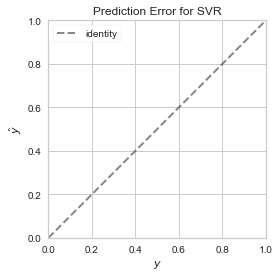

Wall time: 1min 31s


In [701]:
%%time
SVMPred1 = SVM('SVM', Posdf, Year16, '2016 Prediction', 0, 0, 8, 0.3, 'NO')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone', 'NO2', 'SO2']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best CV score = 0.256:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=9, n_iter=5,
             random_state=None, tol=0.0), 'reduce_dim__n_components': 9}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\yellowbrick\base.py:237: YellowbrickWarning: PredictionError does not have a reference to a matplotlib.Axes the figure may not render as expected!
  warn_message.format(self.__class__.__name__), YellowbrickWarning


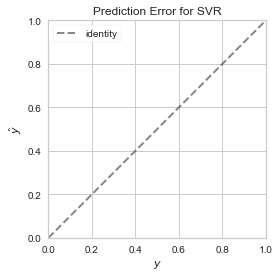

Wall time: 1min 48s


In [702]:
%%time
SVMPredSO2 = SVM('SVM', SPosdf, SYear16, '2016 Prediction', 0, 0, 9, 0.3, 'NO')

In [246]:
print(len(RFPred1))

7728


In [247]:
DayPM10_16 = DayPM10_16.dropna(axis=0)
print((DayPM10_16))

          Date  PM10
0   2016-01-01  16.0
1   2016-02-01  14.1
2   2016-03-01  19.1
3   2016-04-01  47.9
4   2016-05-01  14.7
5   2016-06-01  11.9
6   2016-07-01  10.9
7   2016-08-01  25.5
8   2016-09-01  27.3
9   2016-10-01   9.9
10  2016-11-01  13.6
12  2016-01-13  10.2
13  2016-01-14   9.5
14  2016-01-15  17.5
15  2016-01-16  18.6
16  2016-01-17  17.6
17  2016-01-18  17.2
18  2016-01-19  39.2
19  2016-01-20  20.6
20  2016-01-21   8.6
21  2016-01-22  14.8
22  2016-01-23  16.0
23  2016-01-24   7.8
24  2016-01-25  15.5
25  2016-01-26  10.7
26  2016-01-27   7.2
27  2016-01-28   8.8
28  2016-01-29  20.4
29  2016-01-30  11.0
30  2016-01-31   5.2
..         ...   ...
336 2016-02-12  54.1
337 2016-03-12  33.9
338 2016-04-12  29.1
339 2016-05-12  34.8
340 2016-06-12  14.9
341 2016-07-12   6.6
342 2016-08-12  19.7
343 2016-09-12  11.5
344 2016-10-12  17.0
345 2016-11-12  31.1
346 2016-12-12  25.3
347 2016-12-13   6.8
348 2016-12-14  19.1
349 2016-12-15  15.0
350 2016-12-16  18.6
351 2016-12-1

In [ ]:
Finaldf.dropna(inplace=True)
    SFinaldf.dropna(inplace=True)
    Finaldf['ones']=1
    A = Finaldf[['Actual Daily PM10','ones']]
    y = Finaldf['Predicted Daily PM10']
    m, c = np.linalg.lstsq(A,y)[0]
    
    SFinaldf['ones']=1
    SA = SFinaldf[['Actual Daily PM10','ones']]
    Sy = SFinaldf['Predicted Daily PM10']
    Sm, Sc = np.linalg.lstsq(SA,Sy)[0]
    
    
    Finaldf.plot.scatter(x = 'Actual Daily PM10', y = 'Predicted Daily PM10', linewidth=0.7, figsize=(25, 10))
    x = Finaldf['Actual Daily PM10']
    y_line = c + m * x
    plt.plot(x,y_line, color='red')
    SFinaldf.plot.scatter(x = 'Actual Daily PM10', y = 'Predicted Daily PM10', linewidth=0.7, figsize=(25, 10))
    
    #plug x in the equation y=mx+c
    y_line = c + m * x
    plt.plot(x,y_line, color='red')
    plt.title("Graph of Predicted and Actual PM10 daily values for {}".format(Name), fontsize=30)
    plt.xlabel("Actual", fontsize=30)
    plt.ylabel("Predicted", fontsize=30)
    plt.xlim(0, 45)
    plt.ylim(0,60)
    plt.legend(fontsize=20)
    plt.show()

In [707]:
print(len(RFPredSO2))

6720


Unique 322
280
322
280
322
280
Length of nan dates 472
Length of nan dates SO2 6720
Length of actual dates 322
Length of actual dates SO2 280
322
280


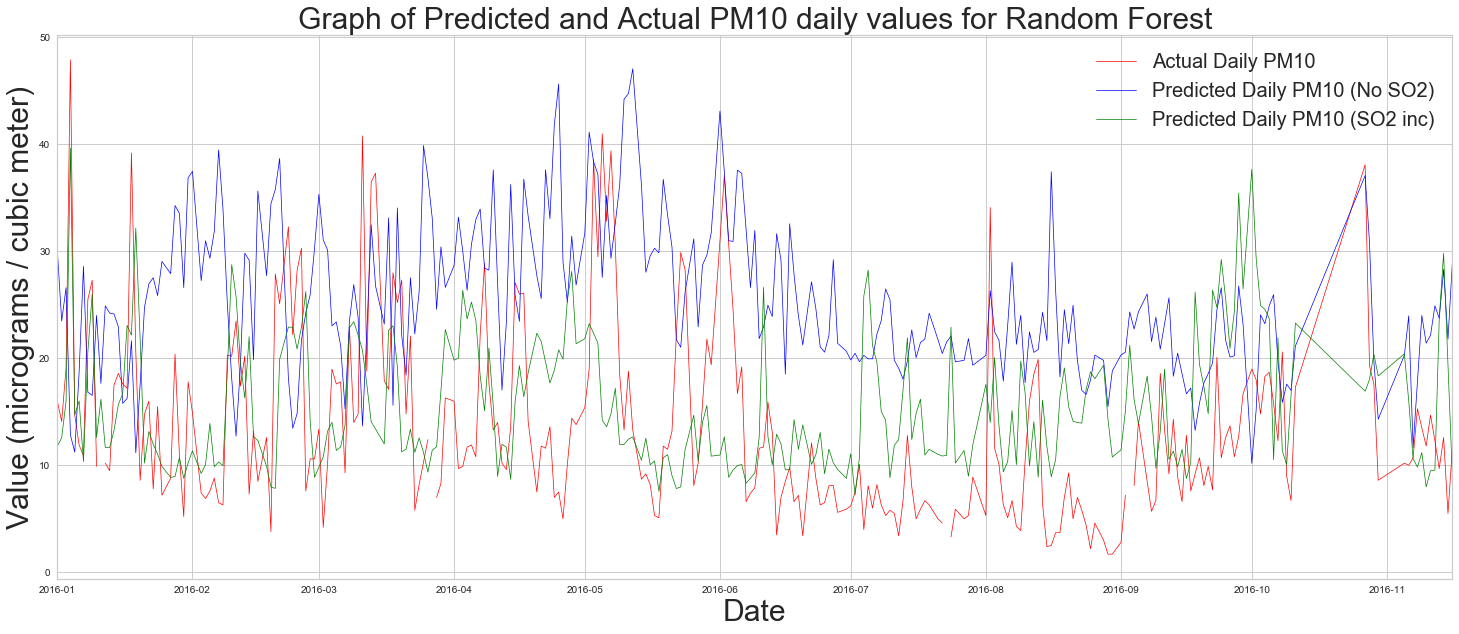

Plot minus 0


NameError: name 'm' is not defined

In [735]:
from matplotlib.pyplot import figure

def PredictionPlot(Name, Data1, Data2, Data3, Data4, Data5, j, k):
    PredDates = []
    SPredDates = []
    PredDates = DYear16['Dates'].values
    Preddf = pd.DataFrame(list(zip(PredDates, Data1)), columns=['Date', 'PM10_Predicted_Values'])
    SPredDates = SDYear16['Dates'].values
    SPreddf = pd.DataFrame(list(zip(PredDates, Data2)), columns=['Date', 'PM10_Predicted_Values'])
    #Preddf['24hr Prediction'] = Preddf.PM10_Predicted_Values.rolling(24, min_periods=0).mean()
    #Preddf['MA'] = Preddf.PM10_Predicted_Values.rolling(window=24).mean()
    
    
    
    ind_date = []
    ind_date = Preddf['Date'].unique()
    S_ind_date = []
    S_ind_date = SPreddf['Date'].unique()
    print('Unique {}'.format(len(ind_date)))
    print(len(S_ind_date))
   
    avg = Preddf.groupby(Preddf.Date).mean()
    Savg = SPreddf.groupby(SPreddf.Date).mean()
    print(len(avg))
    print(len(Savg))
    #print(avg['].values)
    
    
    favg = [] #Array for original predicted daily
    favg = avg['PM10_Predicted_Values'].values
    
    navg = np.zeros(len(favg)) #Array for daily data minus 1
    
    for i in range(len(favg)):
        navg[i] = favg[i] - j
        
    Sfavg = [] #Array for original predicted daily
    Sfavg = Savg['PM10_Predicted_Values'].values
    
    Snavg = np.zeros(len(Sfavg)) #Array for daily data minus 1
    
    for p in range(len(Sfavg)):
        Snavg[p] = Sfavg[p] - j
    
    print(len(navg))
    print(len(Snavg))
    #print(favg)
    #print(navg)
    a = []
    a = Data3['Dates'].values
    
    Sa = []
    Sa = Data4['Dates'].values
    print("Length of nan dates {}".format(len(a)))
    print("Length of nan dates SO2 {}".format(len(Sa)))
    
    rmDdf = Data5[~Data5['Date'].isin(a)]
    
    b = []
    b = rmDdf['Date'].values
    
    SrmDdf = Data5[Data5['Date'].isin(Sa)]
    
    print("Length of actual dates {}".format(len(rmDdf)))
    print("Length of actual dates SO2 {}".format(len(SrmDdf)))
    
    Sb = []
    Sb = SrmDdf['Date'].values
    
    #fdf = Preddf[::24]
    #c = []
    #c = fdf['24hr Prediction'].values
    d = []
    d = rmDdf['PM10'].values
    Sd = []
    Sd = SrmDdf['PM10'].values
    
    print(len(d))
    print(len(Sd))
    
    Finaldf = pd.DataFrame(list(zip(S_ind_date, d, navg, Snavg)), columns=['Date', 'Actual Daily PM10', 'Predicted Daily PM10 (No SO2)', 'Predicted Daily PM10 (SO2 inc)'])
    #SFinaldf = pd.DataFrame(list(zip(ind_date, Sd, Snavg)), columns=['Date', 'Actual Daily PM10', 'Predicted Daily PM10'])
    
    
    Finaldf.to_csv('Daily2016 PM SO2.csv')
    #R2_value = r2_score(Finaldf['Actual Daily PM10'].values, Finaldf['Predicted Daily PM10'].values)
    #return R2_value
    #display(Finaldf)
    

    Finaldf.plot(x='Date', y=["Actual Daily PM10", "Predicted Daily PM10 (No SO2)", "Predicted Daily PM10 (SO2 inc)"], linewidth=0.7, figsize=(25, 10), color=['red', 'blue', 'green'])
    #SFinaldf.plot(x='Date', y="Predicted Daily PM10", linewidth=0.7, figsize=(25, 10), color='cyan')
    plt.title("Graph of Predicted and Actual PM10 daily values for {}".format(Name), fontsize=30)
    plt.xlabel("Date", fontsize=30)
    plt.ylabel("Value (micrograms / cubic meter)", fontsize=30)
    plt.legend(fontsize=20)
    plt.show()
    
    
    
    print("Plot minus {}".format(j))
    print('Slope is: {}'.format(m))
    print('R2 is: {}'.format(R2_value))
    
    if k == 0:
        Pdf = Preddf[['PM10_Predicted_Values']]
        Pdf.to_csv('Hourly2016 Pred.csv')
        Edf = Finaldf[['Actual Daily PM10', 'Predicted Daily PM10']]
        Edf.to_csv('Day2016 PM10 Excel.csv', index=False)

PredictionPlot('Random Forest', RFPred1, RFPredSO2, df16, Sdf16, DayPM10_16, 0, 0)
#PredictionPlot('Random Forest', RFPred1, df, df16, DayPM10_16, 1, 1)
#PredictionPlot('Random Forest', RFPred1, df, df16, DayPM10_16, 12, 1)
#PredictionPlot('Random Forest', RFPred1, df, df16, DayPM10_16, 24, 1)

In [730]:
from matplotlib.pyplot import figure
import matplotlib.dates as mdates

def DiffPredictionPlot(Name, Data1, Data2, Data3, Data4, printg):
    Preddf = pd.DataFrame(list(zip(Data1)), columns=['PM10_Predicted_Values'])
    Preddf['24hr Prediction'] = Preddf.PM10_Predicted_Values.rolling(24, min_periods=0).mean()
    Preddf['MA'] = Preddf.PM10_Predicted_Values.rolling(window=24).mean()
    
    a = []
    a = Data3['Dates'].values
    
    
    rmDdf = Data4[~Data4['Date'].isin(a)]
    
    b = []
    b = rmDdf['Date'].values
    
    
    fdf = Preddf[::24]
    c = []
    c = fdf['24hr Prediction'].values
    
    d = []
    d = rmDdf['PM10'].values
    
    Finaldf = pd.DataFrame(list(zip(b, d, c)), columns=['Date', 'Actual Daily PM10', 'Predicted Daily PM10'])

    N_data = len(Finaldf)
    N = np.zeros(N_data)

    for i in range(N_data):
        N[i] = abs(d[i] - c[i])

    #print(len(PM10))
    #R2_value = []
    R2_value = r2_score(Finaldf['Actual Daily PM10'].values, Finaldf['Predicted Daily PM10'].values)
    #return R2_value
    #R2 = pd.DataFrame(list(zip(Name, R2_value)), columns=['Algorithm', 'R2'])
    print('R2 is: {}'.format(R2_value))
    
    Plotdf = pd.DataFrame(list(zip(b, N)), columns=['Date', 'Daily PM10 Value Difference'])
   
    if printg == 0:
        figure(figsize=(25, 10))
        Plotdf.plot('Date', 'Daily PM10 Value Difference', linewidth=0.7, figsize=(25, 10))
        plt.title("Graph of the difference between Predicted and Actual Daily PM10 Values for {}".format(Name), fontsize=30)
        plt.xlabel("Date", fontsize=30)
        plt.ylabel("Value", fontsize=30)
        plt.legend(fontsize=20)
        plt.show()
    
    
    max_diff = np.array([max(N)])
    min_diff = np.array([min(N)])
    Title  = np.array([Name])
    
    
    df = pd.DataFrame(list(zip(Title, max_diff, min_diff)), columns =['Algorithm', 'Max Difference', 'Min Difference'])
    
    if printg == 0:
        print('Max difference between Actual and Predicted Daily PM10 Values: {}'.format(max(N)))
        print('Min difference between Actual and Predicted Daily PM10 Values: {}'.format(min(N)))
    
    return R2
#DiffPredictionPlot('Random Forest', RFPred1, df, df16, DayPM10_16)

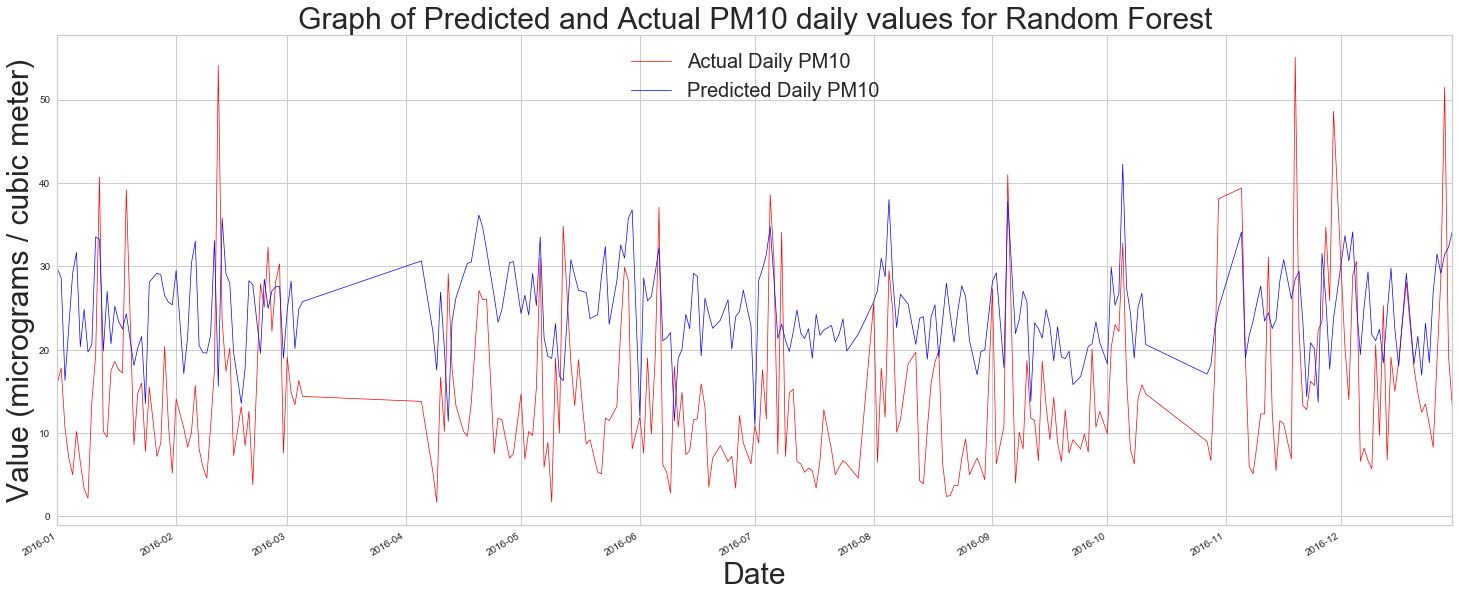

R2 is: -1.0838782897319175


<Figure size 1800x720 with 0 Axes>

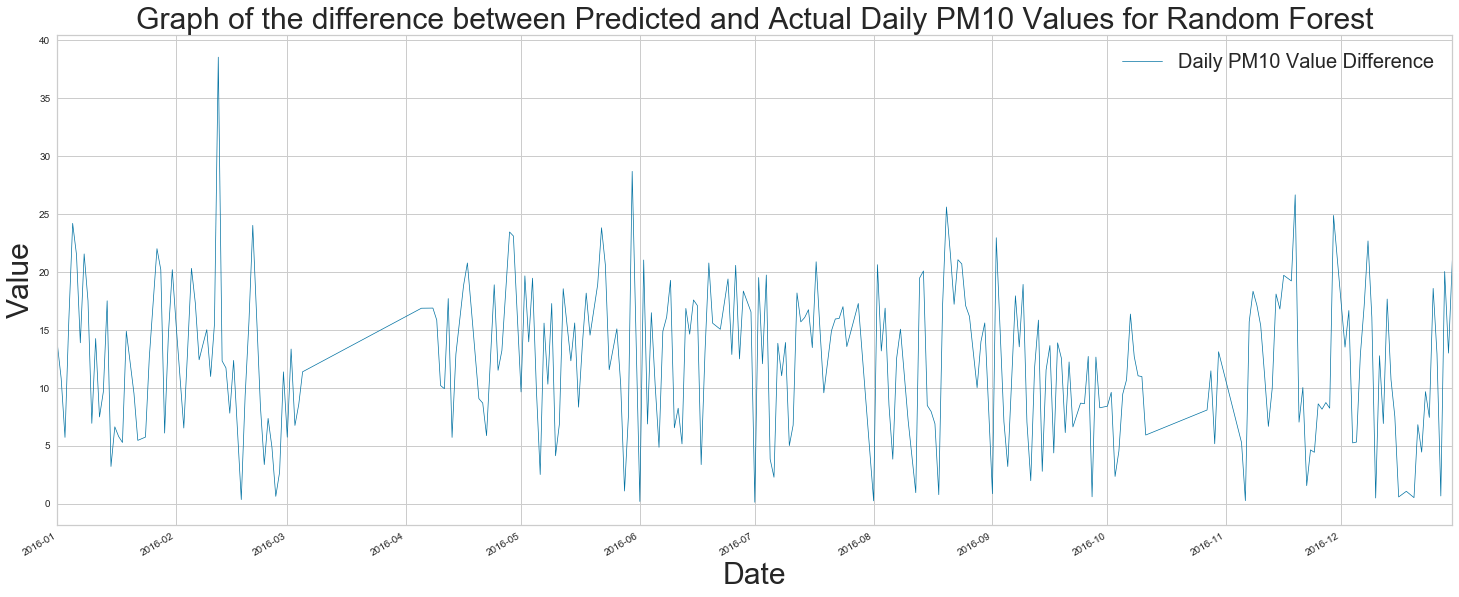

Max difference between Actual and Predicted Daily PM10 Values: 38.51125000000002
Min difference between Actual and Predicted Daily PM10 Values: 0.1216666666666697


NameError: name 'R2' is not defined

In [687]:
PredictionPlot('Random Forest', RFPred1, df, df16, DayPM10_16)
DiffPredictionPlot('Random Forest', RFPred1, df, df16, DayPM10_16, 0)

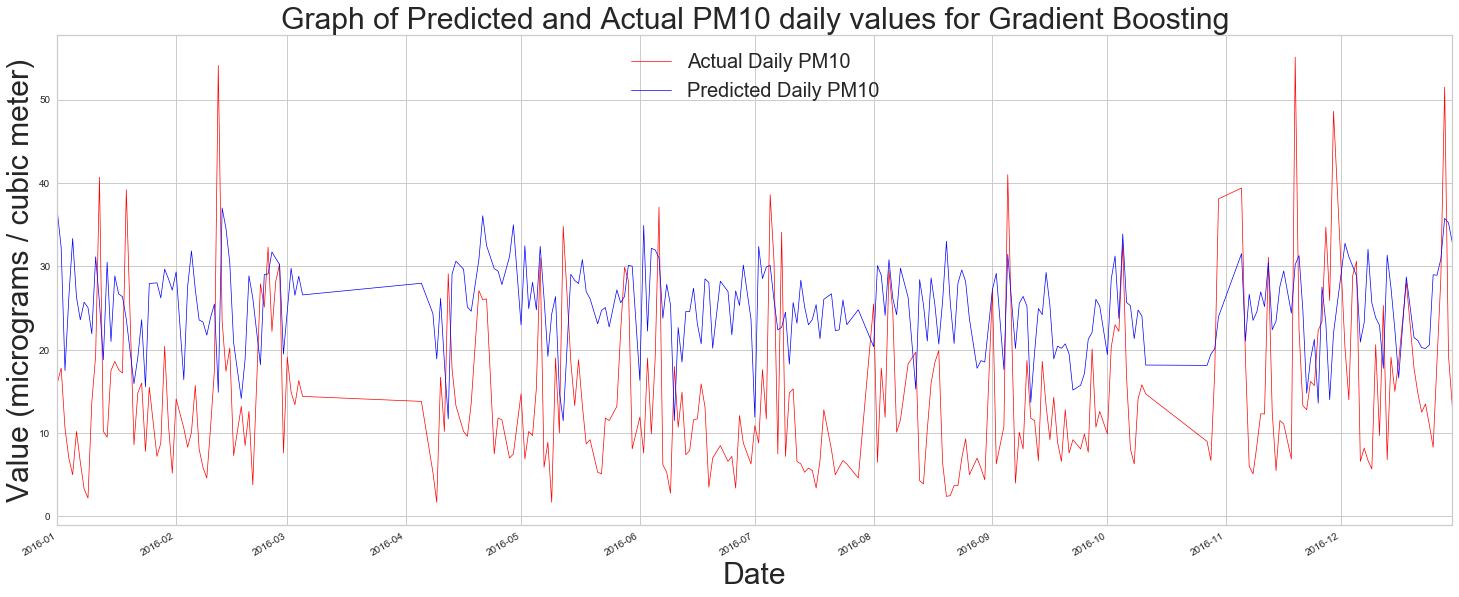

R2 is: -1.4009683240768669


<Figure size 1800x720 with 0 Axes>

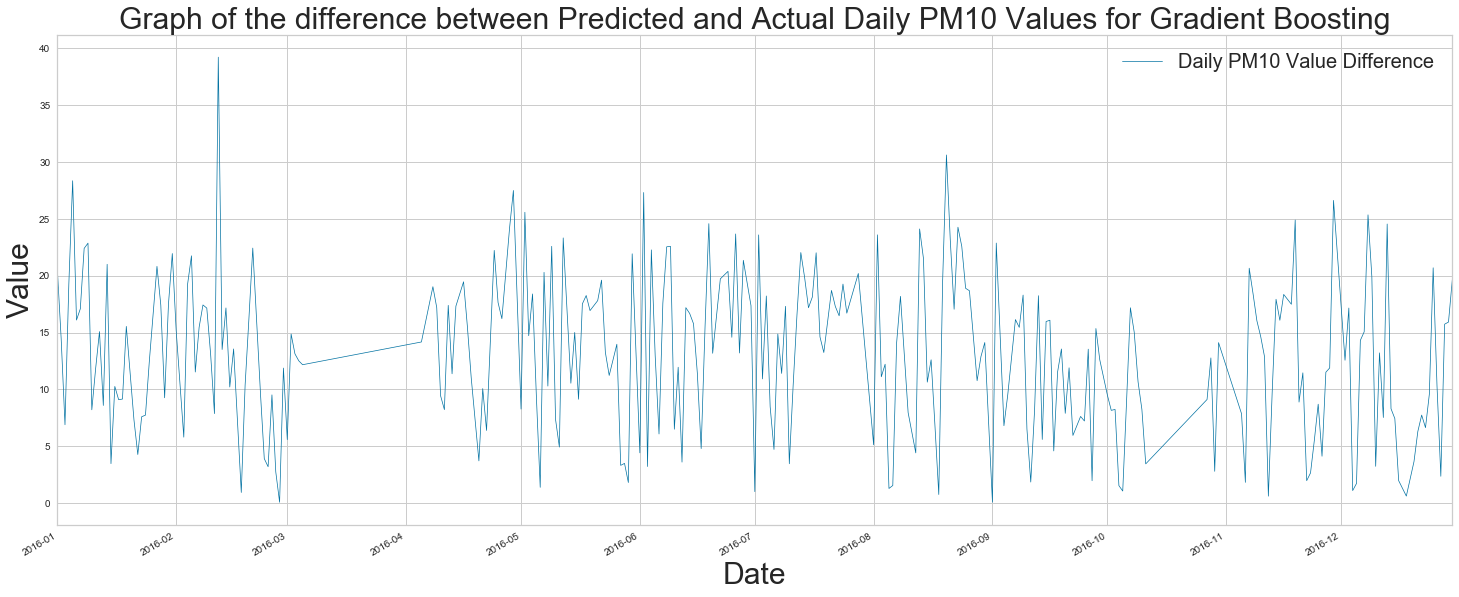

Max difference between Actual and Predicted Daily PM10 Values: 39.20571308728371
Min difference between Actual and Predicted Daily PM10 Values: 0.0882585585963298


In [664]:
PredictionPlot('Gradient Boosting', GBPred1, df, df16, DayPM10_16)
DiffPredictionPlot('Gradient Boosting', GBPred1, df, df16, DayPM10_16)

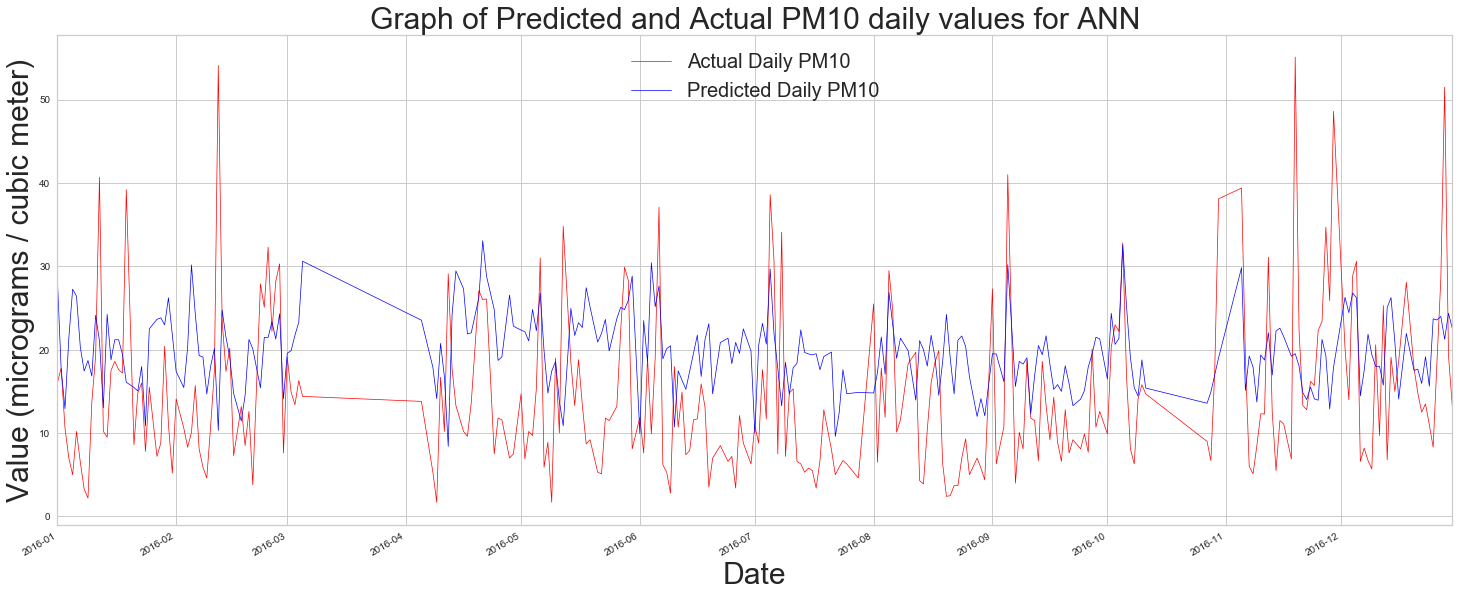

R2 is: -0.35721672399993487


<Figure size 1800x720 with 0 Axes>

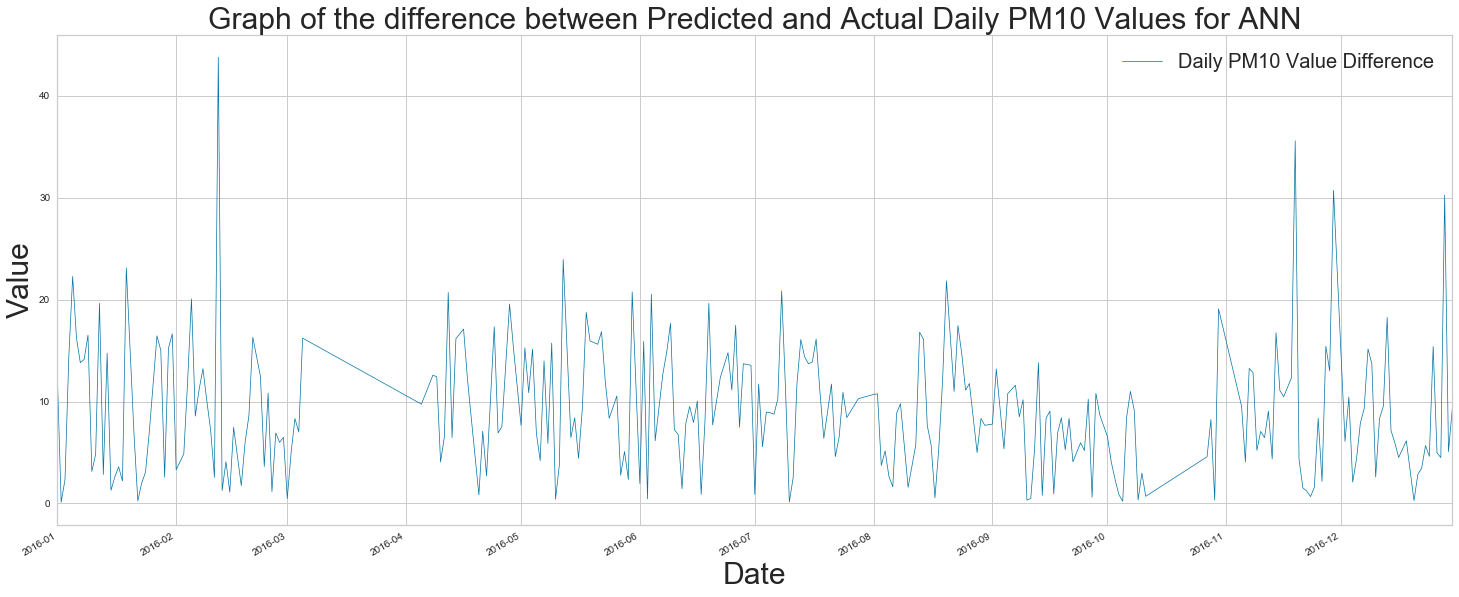

Max difference between Actual and Predicted Daily PM10 Values: 43.77663528693083
Min difference between Actual and Predicted Daily PM10 Values: 0.11874109390078047


In [665]:
PredictionPlot('ANN', MLPPred1, df, df16, DayPM10_16)
DiffPredictionPlot('ANN', MLPPred1, df, df16, DayPM10_16)

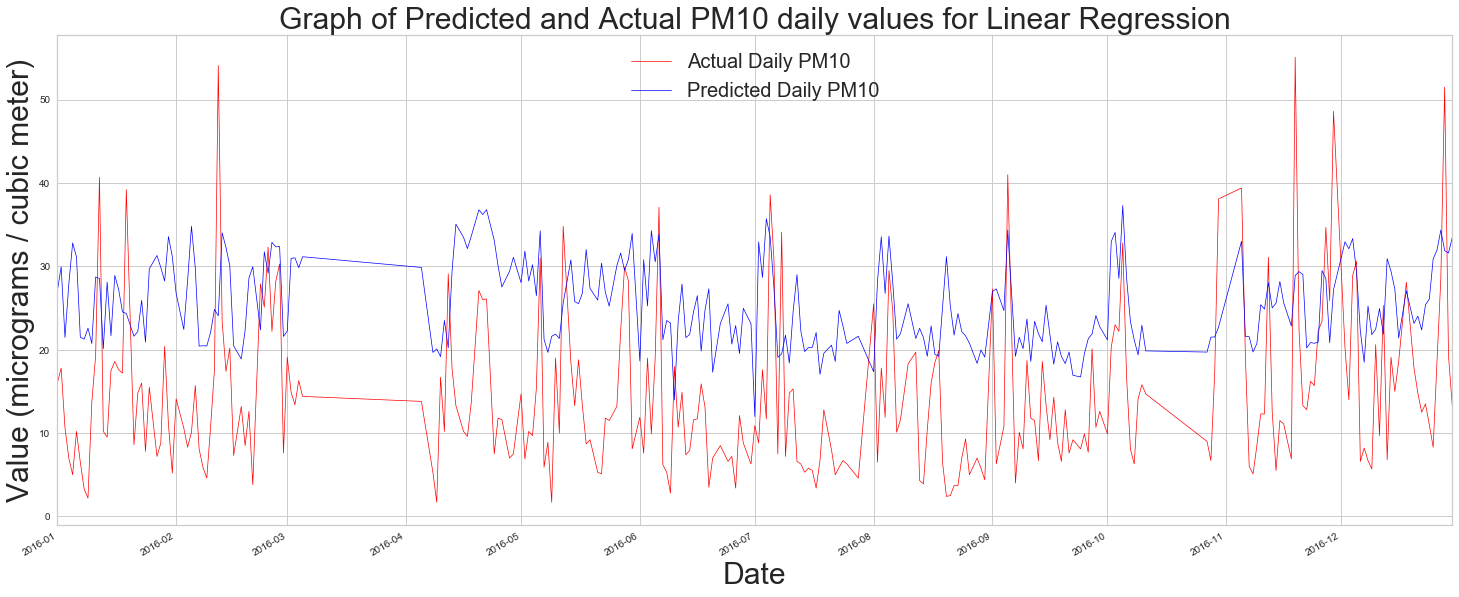

R2 is: -1.2527881306668411


<Figure size 1800x720 with 0 Axes>

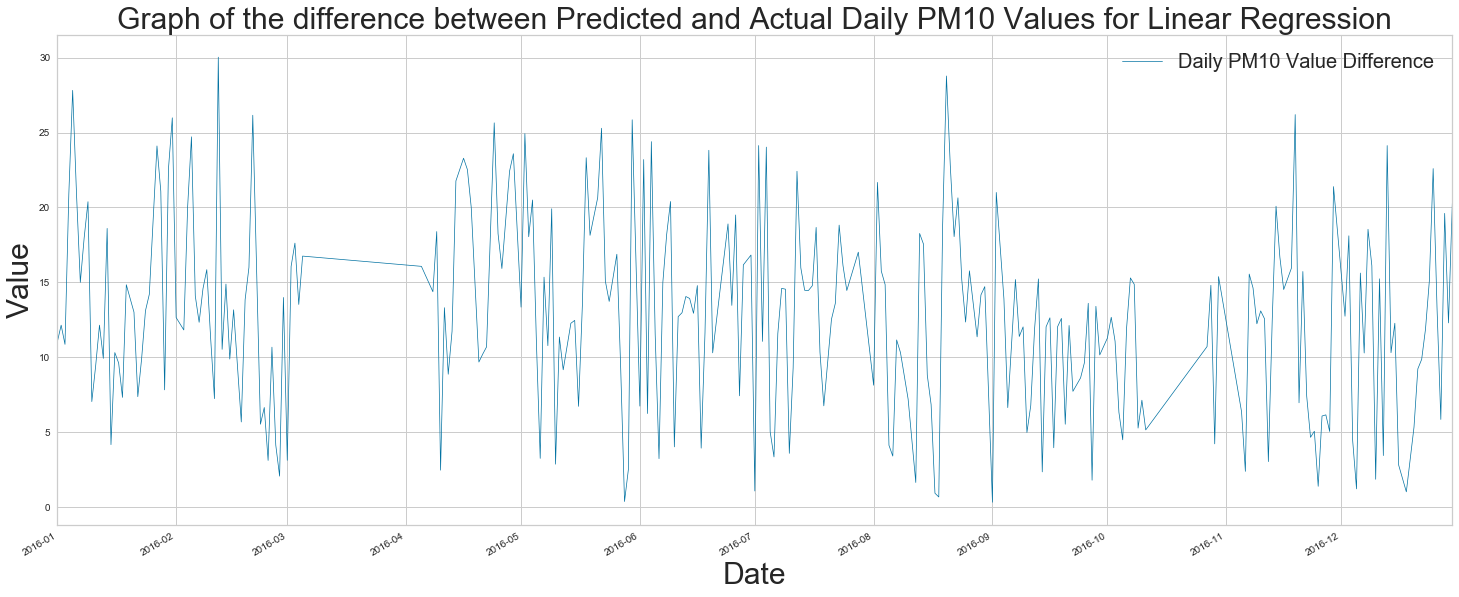

Max difference between Actual and Predicted Daily PM10 Values: 30.028017576294683
Min difference between Actual and Predicted Daily PM10 Values: 0.33319917489325945


In [666]:
PredictionPlot('Linear Regression', LRPred1, df, df16, DayPM10_16)
DiffPredictionPlot('Linear Regression', LRPred1, df, df16, DayPM10_16)

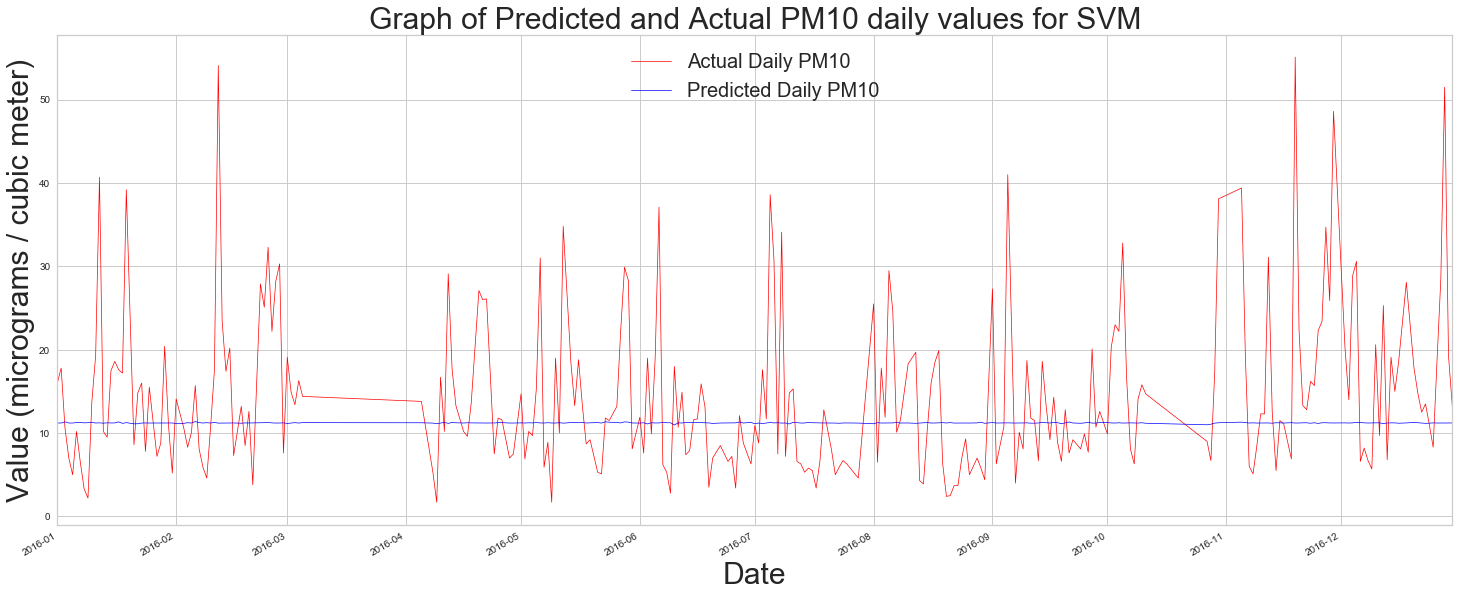

R2 is: -0.10855233619513638


<Figure size 1800x720 with 0 Axes>

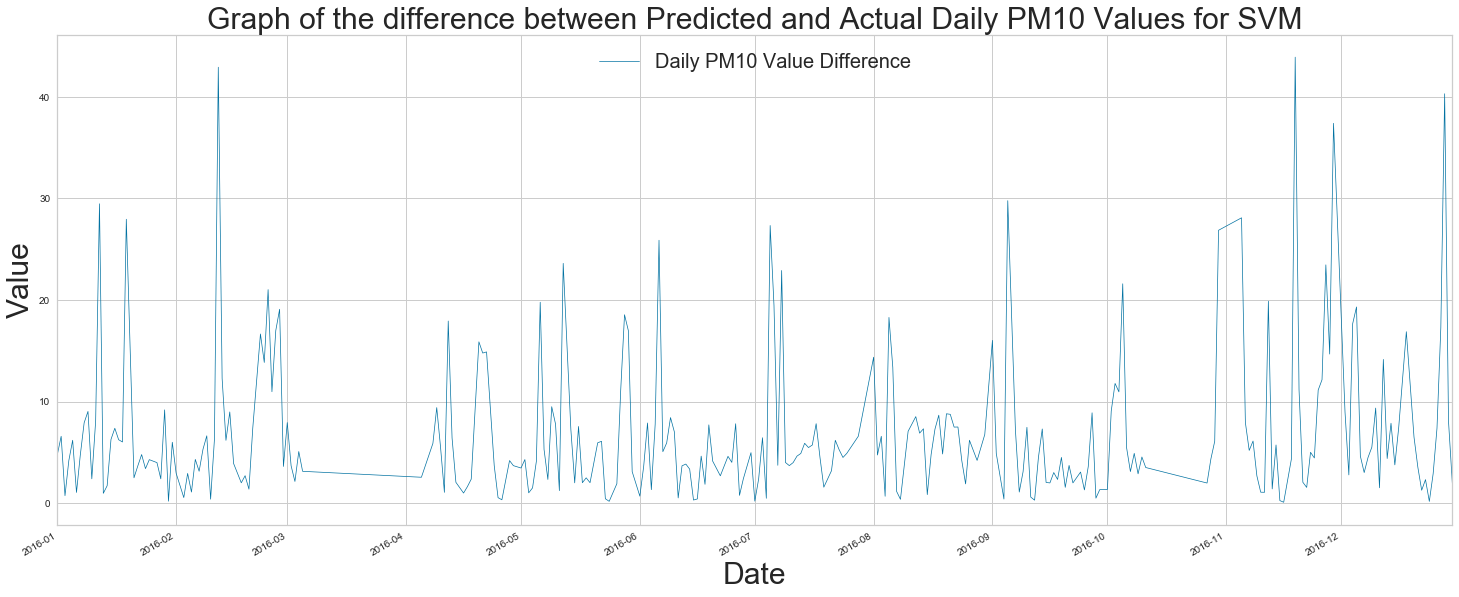

Max difference between Actual and Predicted Daily PM10 Values: 43.895057590007255
Min difference between Actual and Predicted Daily PM10 Values: 0.10491187260263501


In [667]:
PredictionPlot('SVM', SVMPred1, df, df16, DayPM10_16)
DiffPredictionPlot('SVM', SVMPred1, df, df16, DayPM10_16)

In [682]:
RFdiff  = DiffPredictionPlot('Random Forest', RFPred1, df, df16, DayPM10_16, 1)
GBdiff  = DiffPredictionPlot('Gradient Boosting', GBPred1, df, df16, DayPM10_16, 1)
MLPdiff = DiffPredictionPlot('ANN', MLPPred1, df, df16, DayPM10_16, 1)
LRdiff  = DiffPredictionPlot('Linear Regression', LRPred1, df, df16, DayPM10_16, 1) 
SVMdiff = DiffPredictionPlot('SVM', SVMPred1, df, df16, DayPM10_16, 1)

R2 = [RFdiff, GBdiff, MLPdiff, LRdiff, SVMdiff]
print(R2)

TypeError: zip argument #2 must support iteration

In [678]:
Differences = pd.concat([RFdiff, GBdiff, MLPdiff, LRdiff, SVMdiff])

display(Differences)

TypeError: cannot concatenate object of type "<class 'numpy.float64'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [199]:
Predictions2020 = pd.concat([RFStat, GBStat, MLPStat, LRStat, SVMStat])


display(Predictions2020)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Test-Train Split,Year
0,Random Forest,3.992453,88.094802,2.686580,36.973960,12.0,8,NO,0.739803,0.3,2020 Prediction
0,Gradient Boosting,4.498169,92.787633,3.289651,43.035086,12.0,8,NO,0.697149,0.3,2020 Prediction
0,ANN,3.895380,85.886753,2.770385,32.310373,NaN,8,NO,0.772622,0.3,2020 Prediction
0,Linear Regression,5.049961,146.592350,3.869044,54.811039,NaN,8,NO,0.614278,0.3,2020 Prediction
0,SVM,3.961746,152.796333,2.656341,39.884094,NaN,8,NO,0.719324,0.3,2020 Prediction


In [74]:
def AlgorithmTable(Data, Name):
    Dataf = Data
    
    Dataf = Dataf[Data['Algorithm'] == Name]
    
    return Dataf
                  
RFPM25 = AlgorithmTable(PM25incData, 'Random Forest')
RF     = AlgorithmTable(PM25excData, 'Random Forest')

print('Including PM2.5')
display(RFPM25)
print()
print('Excluding PM2.5')
display(RF)

Including PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
0,Random Forest,4.066,117.152,2.856,35.034,12.0,6,NO,0.703,9m 21s,0.7,2015-2019
1,Random Forest,3.890,103.316,2.884,30.739,12.0,7,NO,0.744,8m 34s,0.7,2015-2019
2,Random Forest,3.876,81.200,2.785,30.647,12.0,8,NO,0.743,9m 0s,0.7,2015-2019
3,Random Forest,3.879,81.740,2.909,29.722,12.0,8,NO,0.752,19m 12s,0.5,2015-2019
4,Random Forest,3.662,95.752,2.691,27.355,12.0,8,NO,0.768,32m 25s,0.3,2015-2019
5,Random Forest,3.596,40.327,2.699,24.394,12.0,8,YES,0.773,31m 33s,0.3,2015-2019
6,Random Forest,3.672,32.454,2.749,25.457,14.0,8,YES,0.766,32m 56s,0.3,2015-2019
7,Random Forest,3.620,35.259,2.707,24.683,16.0,8,YES,0.765,33m 4s,0.3,2015-2019
8,Random Forest,3.562,34.589,2.592,24.283,18.0,8,YES,0.773,34m 59s,0.3,2015-2019
9,Random Forest,3.572,36.151,2.698,24.155,20.0,8,YES,0.775,34m 40s,0.3,2015-2019



Excluding PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
0,Random Forest,6.249,141.978,4.740,79.306,12.0,6,NO,0.341,7m 18s,0.7,2015-2019
0,Random Forest,6.230,139.822,4.802,79.381,12.0,7,NO,0.339,7m 15s,0.7,2015-2019
0,Random Forest,5.933,135.827,4.518,72.829,12.0,7,NO,0.389,14m 55s,0.5,2015-2019
0,Random Forest,5.734,130.474,4.276,70.554,12.0,7,NO,0.425,25m 39s,0.3,2015-2019
0,Random Forest,5.586,48.165,4.297,58.311,12.0,7,YES,0.466,25m 36s,0.3,2015-2019
0,Random Forest,5.537,44.910,4.328,56.432,14.0,7,YES,0.453,25m 55s,0.3,2015-2019
0,Random Forest,5.634,49.263,4.388,58.701,16.0,7,YES,0.448,26m 30s,0.3,2015-2019
0,Random Forest,5.530,50.636,4.253,57.637,18.0,7,YES,0.459,27m 28s,0.3,2015-2019
0,Random Forest,5.575,51.287,4.310,57.743,20.0,7,YES,0.457,34m 40s,0.3,2015-2019


In [75]:
GBPM25 = AlgorithmTable(PM25incData, 'Gradient Boosting')
GB     = AlgorithmTable(PM25excData, 'Gradient Boosting')

print('Including PM2.5')
display(GBPM25)
print()
print('Excluding PM2.5')
display(GB)


Including PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
10,Gradient Boosting,4.263,116.550,2.948,40.229,12.0,6,NO,0.666,3m 47s,0.7,2015-2019
11,Gradient Boosting,4.099,116.704,2.932,35.596,12.0,7,NO,0.706,3m 9s,0.7,2015-2019
12,Gradient Boosting,3.950,85.595,2.747,34.719,12.0,8,NO,0.713,3m 36s,0.7,2015-2019
13,Gradient Boosting,3.836,72.496,2.778,30.507,12.0,8,NO,0.741,8m 54s,0.5,2015-2019
14,Gradient Boosting,3.643,71.695,2.633,27.431,12.0,8,NO,0.767,17m 22s,0.3,2015-2019
15,Gradient Boosting,3.535,37.061,2.610,24.148,12.0,8,YES,0.772,17m 40s,0.3,2015-2019
16,Gradient Boosting,3.655,38.883,2.650,25.926,14.0,8,YES,0.756,21m 51s,0.3,2015-2019
17,Gradient Boosting,3.737,48.536,2.651,28.086,16.0,8,YES,0.734,29m 32s,0.3,2015-2019
18,Gradient Boosting,4.245,37.683,3.300,32.717,18.0,8,YES,0.698,39m 5s,0.3,2015-2019
19,Gradient Boosting,4.166,38.216,3.232,31.418,20.0,8,YES,0.703,50m 19s,0.3,2015-2019



Excluding PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
0,Gradient Boosting,6.445,135.671,4.825,84.966,12.0,6,NO,0.296,2m 35s,0.7,2015-2019
0,Gradient Boosting,6.335,131.563,4.730,81.198,12.0,7,NO,0.321,2m 27s,0.7,2015-2019
0,Gradient Boosting,6.108,135.521,4.574,76.253,12.0,7,NO,0.359,6m 53s,0.5,2015-2019
0,Gradient Boosting,5.919,107.969,4.387,72.189,12.0,7,NO,0.400,13m 48s,0.3,2015-2019
0,Gradient Boosting,5.790,55.029,4.401,63.493,12.0,7,YES,0.418,13m 49s,0.3,2015-2019
0,Gradient Boosting,5.633,51.795,4.177,61.425,14.0,7,YES,0.434,16m 7s,0.3,2015-2019
0,Gradient Boosting,5.716,51.792,4.166,64.272,16.0,7,YES,0.408,19m 12s,0.3,2015-2019
0,Gradient Boosting,5.918,61.762,4.143,71.071,18.0,7,YES,0.346,24m 10s,0.3,2015-2019
0,Gradient Boosting,6.156,57.271,4.213,78.201,20.0,7,YES,0.283,32m 32s,0.3,2015-2019


In [77]:
MLPPM25 = AlgorithmTable(PM25incData, 'ANN')
MLP     = AlgorithmTable(PM25excData, 'ANN')

print('Including PM2.5')
display(MLPPM25)
print()
print('Excluding PM2.5')
display(MLP)

Including PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
20,ANN,4.226,104.033,3.092,37.815,NaN,6,NO,0.686,1m 18s,0.7,2015-2019
21,ANN,3.949,84.574,2.919,30.837,NaN,7,NO,0.742,1m 19s,0.7,2015-2019
22,ANN,3.911,87.883,2.920,29.870,NaN,8,NO,0.748,1m 16s,0.7,2015-2019
23,ANN,3.859,82.545,2.895,29.164,NaN,8,NO,0.759,2m 6s,0.5,2015-2019
24,ANN,3.823,50.151,2.851,28.223,NaN,8,NO,0.766,3m 1s,0.3,2015-2019
25,ANN,3.713,35.441,2.745,25.766,NaN,8,YES,0.754,2m 58s,0.3,2015-2019



Excluding PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
0,ANN,6.550,133.926,5.171,82.955,NaN,6,NO,0.300,1m 12s,0.7,2015-2019
0,ANN,6.501,134.251,5.018,83.731,NaN,7,NO,0.306,1m 13s,0.7,2015-2019
0,ANN,6.466,124.758,5.114,81.627,NaN,7,NO,0.319,2m 3s,0.5,2015-2019
0,ANN,6.337,130.745,4.906,79.154,NaN,7,NO,0.325,2m 53s,0.3,2015-2019
0,ANN,6.218,53.065,4.822,71.768,NaN,7,YES,0.337,2m 56s,0.3,2015-2019


In [78]:
LRPM25 = AlgorithmTable(PM25incData, 'Linear Regression')
LR     = AlgorithmTable(PM25excData, 'Linear Regression')

print('Including PM2.5')
display(LRPM25)
print()
print('Excluding PM2.5')
display(LR)

Including PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
26,Linear Regression,5.036,118.778,3.974,49.438,NaN,6,NO,0.587,4m 56s,0.7,2015-2019
27,Linear Regression,5.029,117.399,3.974,49.478,NaN,7,NO,0.588,3m 59s,0.7,2015-2019
28,Linear Regression,5.017,117.681,3.969,49.062,NaN,8,NO,0.592,3m 48s,0.7,2015-2019
29,Linear Regression,4.997,117.778,3.921,49.236,NaN,8,NO,0.590,13m 46s,0.5,2015-2019
30,Linear Regression,5.042,111.132,3.967,49.024,NaN,8,NO,0.591,26m 30s,0.3,2015-2019
31,Linear Regression,4.796,40.267,3.797,40.545,NaN,8,YES,0.622,28m 28s,0.3,2015-2019



Excluding PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
0,Linear Regression,7.214,143.490,5.859,99.256,NaN,6,NO,0.171,3m 27s,0.7,2015-2019
0,Linear Regression,7.166,130.067,5.844,95.043,NaN,7,NO,0.182,3m 17s,0.7,2015-2019
0,Linear Regression,7.142,143.243,5.782,97.405,NaN,7,NO,0.176,9m 50s,0.5,2015-2019
0,Linear Regression,7.253,143.390,5.853,101.030,NaN,7,NO,0.172,20m 57s,0.3,2015-2019
0,Linear Regression,6.927,54.816,5.750,82.782,NaN,7,YES,0.200,22m 6s,0.3,2015-2019


In [79]:
SVMPM25 = AlgorithmTable(PM25incData, 'SVM')
SVM     = AlgorithmTable(PM25excData, 'SVM')

print('Including PM2.5')
display(SVMPM25)
print()
print('Excluding PM2.5')
display(SVM)

Including PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
32,SVM,4.536,116.275,3.278,43.342,NaN,6,NO,0.628,1m 1s,0.7,2015-2019
33,SVM,4.031,121.663,2.789,38.382,NaN,7,NO,0.682,0m 55s,0.7,2015-2019
34,SVM,4.018,120.315,2.780,37.890,NaN,8,NO,0.684,0m 56s,0.7,2015-2019
35,SVM,3.886,116.156,2.733,34.398,NaN,8,NO,0.709,2m 43s,0.5,2015-2019
36,SVM,3.872,104.645,2.725,32.656,NaN,8,NO,0.714,6m 37s,0.3,2015-2019
37,SVM,3.789,43.512,2.696,29.043,NaN,8,YES,0.730,6m 15s,0.3,2015-2019



Excluding PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
0,SVM,6.366,140.218,4.584,89.565,NaN,6,NO,0.254,0m 58s,0.7,2015-2019
0,SVM,6.373,137.550,4.589,89.894,NaN,7,NO,0.254,0m 54s,0.7,2015-2019
0,SVM,6.278,130.062,4.520,86.092,NaN,7,NO,0.267,2m 37s,0.5,2015-2019
0,SVM,6.302,138.096,4.505,89.100,NaN,7,NO,0.272,5m 17s,0.3,2015-2019
0,SVM,6.156,56.906,4.462,75.582,NaN,7,YES,0.294,5m 11s,0.3,2015-2019
